In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("C://Users\ABHIJIT KHULE//Downloads//LP-III(DAA,ML,BCT)//ml//Experiment 2//Churn_Modelling.csv")

In [5]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])  # Drop unnecessary columns
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)  # One-hot encoding

In [6]:
# Split the dataset into features and target
X = data.drop(columns=['Exited'])
y = data['Exited']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.4608 - accuracy: 0.7952 - val_loss: 0.3879 - val_accuracy: 0.8385
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3777 - accuracy: 0.8447 - val_loss: 0.3570 - val_accuracy: 0.8550
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3531 - accuracy: 0.8571 - val_loss: 0.3480 - val_accuracy: 0.8565
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3433 - accuracy: 0.8591 - val_loss: 0.3450 - val_accuracy: 0.8585
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3401 - accuracy: 0.8596 - val_loss: 0.3449 - val_accuracy: 0.8585
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.8595 - val_loss: 0.3498 - val_accuracy: 0.8590
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3325 - accuracy: 0.8633 - val_loss: 0.3462 - val_accuracy: 0.8535
Epoch 

In [12]:
# Make predictions
predictions = (model.predict(X_test) > 0.5).astype(np.int32)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


63/63 [==============================] - 0s 2ms/step
Accuracy: 0.86


Confusion Matrix:
[[1531   76]
 [ 200  193]]


Text(0.5, 1.0, 'Confusion Matrix')

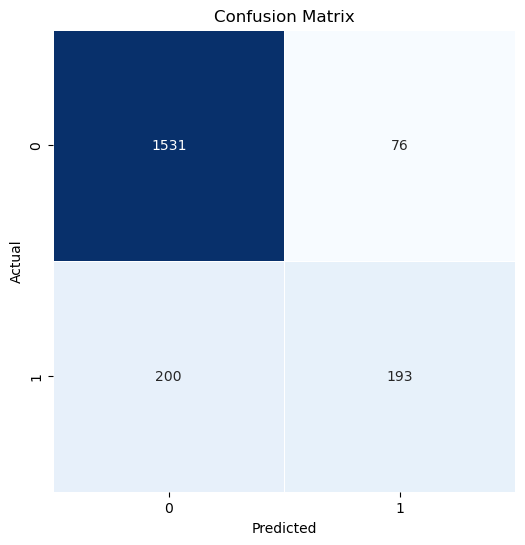

In [16]:

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")